In [244]:
import MySQLdb
conn = MySQLdb.connect(host='127.0.0.1', port=3306, user='root', passwd='123', db='edm', charset='utf8')
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pandas.io.sql as sql

## 试卷相关分析

In [24]:
data = sql.read_sql("select count(*) as skill_points_number, paper_id as paper from (select* from self_test_logs where type=2) T group by paper_id order by skill_points_number desc", conn)

In [25]:
data.head()

,skill_points_number,paper
0,22,282
1,22,1409
2,22,1999
3,17,71
4,17,186


In [11]:
import matplotlib.pyplot as plt

Text(0,0.5,'number of skil points')

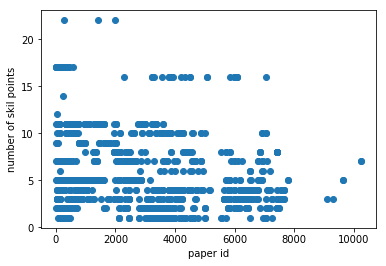

In [27]:
plt.scatter(data['paper'], data['skill_points_number'])
plt.xlabel('paper id')
plt.ylabel('number of skil points')

In [59]:
datax = sql.read_sql("select count(*) as x_count, paper_id from (select paper_id, skill_point_id, IMPORTANCE from self_test_logs, skill_tree where self_test_logs.type=2 and self_test_logs.skill_point_id = skill_tree.ID and IMPORTANCE='X' order by paper_id asc) T group by paper_id", conn)
datay = sql.read_sql("select count(*) as y_count, paper_id from (select paper_id, skill_point_id, IMPORTANCE from self_test_logs, skill_tree where self_test_logs.type=2 and self_test_logs.skill_point_id = skill_tree.ID and IMPORTANCE='Y' order by paper_id asc) S group by paper_id", conn)
dataz = sql.read_sql("select count(*) as z_count, paper_id from (select paper_id, skill_point_id, IMPORTANCE from self_test_logs, skill_tree where self_test_logs.type=2 and self_test_logs.skill_point_id = skill_tree.ID and IMPORTANCE='Z' order by paper_id asc) E group by paper_id", conn)

In [63]:
datax.head()

,x_count,paper_id
0,15,10
1,4,11
2,15,12
3,2,13
4,5,14


In [66]:
datay.head()

,y_count,paper_id
0,2,10
1,2,11
2,2,12
3,2,15
4,4,16


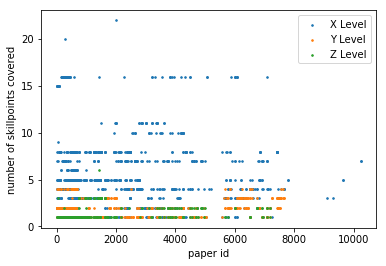

In [81]:
plt.scatter(datax['paper_id'], datax['x_count'], s=10, marker='.')
plt.scatter(datay['paper_id'], datay['y_count'], s=10, marker='.')
plt.scatter(dataz['paper_id'], dataz['z_count'], s=10, marker='.')
plt.xlabel('paper id')
plt.ylabel('number of skillpoints covered')
plt.legend(['X Level', 'Y Level', 'Z Level'])

## 学后测试相关分析

### 学后测试试卷问题数量分布

In [93]:
data4 = sql.read_sql("select count(*) as qnum, paper_id from(select* from self_test_logs where type=2) T group by paper_id", conn)

In [86]:
data4.index = data4['paper_id']

In [87]:
data4.head()

,qnum,paper_id
paper_id,,
10,17,10
11,7,11
12,17,12
13,2,13
14,5,14


In [89]:
data4 = data4.iloc[:, 0:1]

In [90]:
data4.describe()

,qnum
count,1490.000000
mean,6.138255
std,4.188276
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,22.000000


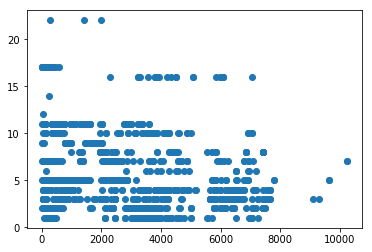

In [96]:
plt.scatter(data4['paper_id'],data4['qnum'])

## 学习者-作业-技能点

In [154]:
data5 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10326738 order by assignments", conn)
data6 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10690049 order by assignments", conn)
data7 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10702955 order by assignments", conn)
data8 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10703147 order by assignments", conn)
data9 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10704173 order by assignments", conn)
data10 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10705025 order by assignments", conn)
data11 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10706459 order by assignments", conn)
data12 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10716173 order by assignments", conn)
data13 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10717193 order by assignments", conn)
data14 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10717433 order by assignments", conn)
data15 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10717553 order by assignments", conn)
data16 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10722185 order by assignments", conn)
data17 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10722383 order by assignments", conn)
data18 = sql.read_sql("select id as assignments, SkillPoint from learner_assignments where uid=10724783 order by assignments", conn)

In [155]:
aList = []
aList.append(data5)
aList.append(data6)
aList.append(data7)
aList.append(data8)
aList.append(data9)
aList.append(data10)
aList.append(data11)
aList.append(data12)
aList.append(data13)
aList.append(data14)
aList.append(data15)
aList.append(data16)
aList.append(data17)
aList.append(data18)

In [164]:
for j in range(14):
    data = aList[j]
    num = data['assignments'].count()
    data['count'] = 0
    for i in range(num):
        list_of_skillpoints = data[i:i+1]['SkillPoint'].to_string()
        list_of_skillpoints = list_of_skillpoints.split(',')
        skillpoints_number = len(list_of_skillpoints)
        data['count'][i] = skillpoints_number
        i = i+1
    data['sum'] = data['count'].cumsum()
    j = j+1

c:\users\x1\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [167]:
aList[1].head()

,assignments,SkillPoint,count,sum
0,assignment47,"['jQ29', 'jQ22']",2,2
1,assignment48,"['H22', 'H23', 'H24', 'H25', 'H59', 'H60', 'C36']",7,9
2,assignment49,"['H22', 'H23', 'H24', 'H25', 'H59', 'H60', 'C36']",7,16
3,assignment50,"['H26', 'H27', 'H28', 'H61']",4,20
4,assignment51,"['H26', 'H27', 'H28', 'H61']",4,24


In [178]:
uid = "10326738、10690049、10702955、10703147、10704173、10705025、10706459、10716173、10717193、10717433、10717553、10722185、10722383、10724783"
uid = uid.split('、')

In [183]:
for i in range(14):
    print(uid[i])


10326738
10690049
10702955
10703147
10704173
10705025
10706459
10716173
10717193
10717433
10717553
10722185
10722383
10724783


In [201]:
aList[2]

,assignments,SkillPoint,count,sum
0,assignment100,"['V13', 'V14', 'V15']",3,3
1,assignment101,"['V16', 'V17', 'V18', 'V19']",4,7
2,assignment102,"['V20', 'V21']",2,9
3,assignment103,"['V22', 'V23', 'V24', 'V25', 'V26']",5,14
4,assignment52,"['C38', 'C39', 'C40', 'C41', 'C60']",5,19
5,assignment57,"['C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C34']",7,26
6,assignment64,['jQ29'],1,27
7,assignment65,"['H62', 'C16', 'C17', 'C18', 'C44', 'C58', 'C5...",7,34
8,assignment66,"['B1', 'B2', 'B3', 'B4']",4,38
9,assignment67,"['B5', 'B7']",2,40


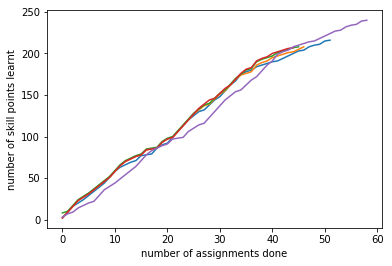

In [215]:
for i in range(14):
    if(aList[i].iloc[-1]['sum']>200):
        aList[i]['sum'].plot()
        #plt.legend(uid[i], ncol=2, bbox_to_anchor=(1.5,0.3))
    
plt.xlabel('number of assignments done')
plt.ylabel('number of skill points learnt')
plt.show()

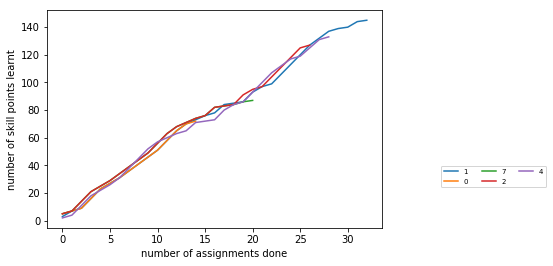

In [221]:
for i in range(14):
    if(aList[i].iloc[-1]['sum']<150):
        aList[i]['sum'].plot()
    plt.legend(uid[i], ncol=3, bbox_to_anchor=(1.5,0.3), fontsize='x-small')
    
plt.xlabel('number of assignments done')
plt.ylabel('number of skill points learnt')
plt.show()

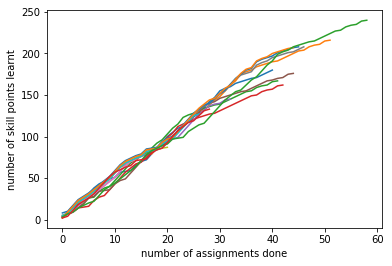

In [214]:
for i in range(14):
    #if(aList[i].iloc[-1]['sum']<=150):
        aList[i]['sum'].plot()
       # plt.legend(uid[i], ncol=3, bbox_to_anchor=(1.5,0.3))
    
plt.xlabel('number of assignments done')
plt.ylabel('number of skill points learnt')
plt.show()

## 学习者-测验-错题频率

In [227]:
data6 = sql.read_sql("select S.ID, S.NAME, U.question_id, U.num from user_test_wronglogs U, question_skill_link Q, skill_tree S  where U.user_id=10326738 and U.question_id=Q.QUESTION_ID and Q.EXAM_SKILL_ID=S.ID", conn)

In [229]:
data6.head()

,ID,NAME,question_id,num
0,171,了解网页制作标准（W3C标准）,6510,1
1,16011,掌握HTML注释和特殊字符的使用,603,1
2,172,熟悉HTML基本标签的分类,28296,1
3,172,熟悉HTML基本标签的分类,27446,1
4,174,掌握在页面中设置不同功能超链接的实现方法,4210,1


In [235]:
grouped = data6['num'].groupby([data6['ID'],data6['NAME']])

In [237]:
data7 = grouped.sum()

In [241]:
data7.sort_values(ascending=False)

ID     NAME                               
11836  CSS复合选择器                               9
11561  使用Date对象实现时钟特效                         6
10638  JavaScript的概念、技术组成、基本结构、引用方式           6
10719  使用JSON格式传递对象数组                         5
15592  jQuery遍历节点的方法                          5
16051  掌握并集选择器的用法                             5
10710  节点操作（查找、创建、插入、删除、替换和复制）、属性操作（设置和删除）    4
10664  window对象                               4
16104  window对象                               4
16053  掌握层次选择器的使用                             4
10640  变量的声明和赋值                               4
16158  节点操作（查找、创建、插入、删除、替换和复制）                4
10669  Date对象                                 4
11559  String对象                               4
15600  创建对象                                   3
10643  对象                                     3
10667  document对象                             3
16076  变量的声明和赋值                               3
10716  使用$.post()实现Ajax                       3
206    理解盒子模型的概念                             

In [242]:
data6 = sql.read_sql("select S.ID, S.NAME, U.question_id, U.num from user_test_wronglogs U, question_skill_link Q, skill_tree S  where U.user_id=10690049 and U.question_id=Q.QUESTION_ID and Q.EXAM_SKILL_ID=S.ID", conn)
grouped = data6['num'].groupby([data6['ID'],data6['NAME']])
data7 = grouped.sum()
data7.sort_values(ascending=False)

ID     NAME                        
174    掌握在页面中设置不同功能超链接的实现方法            6
13542  了解html基本概念                      5
16015  掌握图像标签的属性和使用方法                  4
173    掌握不同HTML基本标签的使用方法               4
10712  DOM操作中常用API的用法（综合应用）            3
16157  JavaScript的概念                   3
196    掌握不同选择器样式的定义方法及使用               3
16017  掌握超链接的基本语法                      3
10638  JavaScript的概念、技术组成、基本结构、引用方式    3
200    掌握字体属性的内容                       3
16042  掌握盒子实际尺寸的计算方法及应用                3
13418  掌握使用CSS清除浮动属性的方法                3
16158  节点操作（查找、创建、插入、删除、替换和复制）         3
202    掌握背景属性的内容                       3
172    熟悉HTML基本标签的分类                   3
10714  使用$.ajax()实现Ajax                3
10719  使用JSON格式传递对象数组                  3
17279  服务概述                            3
16006  掌握标题标签的使用                       2
16018  了解超链接的分类                        2
16011  掌握HTML注释和特殊字符的使用                2
10669  Date对象                          2
15592  jQuery遍历节点的方法                   2
13963  Bootstrap旋转轮播插

In [246]:
data7 = sql.read_sql("SELECT skill, sum(degree) as sums, count(*) as counts from(select B.QUESTION_ID as question, B.EXAM_SKILL_ID as skill, A.DEGREE as degree from questions A, question_skill_link B where A.question_id = B.QUESTION_ID) T group by skill", conn)

In [247]:
data7.head()

,skill,sums,counts
0,169,77.0,44
1,170,134.0,74
2,171,84.0,42
3,172,135.0,77
4,173,43.0,28


In [248]:
data7['level'] = data7['sums']/data7['counts']

In [251]:
data7.sort_values(by='level')

,skill,sums,counts,level
121,11841,3.0,3,1.000000
130,12433,1.0,1,1.000000
240,15505,1.0,1,1.000000
119,11837,2.0,2,1.000000
253,16009,2.0,2,1.000000
122,11845,1.0,1,1.000000
347,17229,1.0,1,1.000000
103,11788,1.0,1,1.000000
180,13888,2.0,2,1.000000
225,14926,1.0,1,1.000000


In [252]:
#1-2 概念学习， 2-3实践学习， 大于3两者皆需
data7['tag'] = 'na'

In [274]:
data7.loc[0,'tag']

'概念学习'

In [271]:
for i in range(367):
    if((data7.loc[i]['level'] >=1) and (data7.loc[i]['level'] <=2)):
        data7.iloc[i:i+1]['tag'] = '概念学习'
    if((data7.loc[i]['level'] >2) and (data7.loc[i]['level'] <=3)):
        data7.iloc[i:i+1]['tag'] = '实践学习'
    if(data7.loc[i]['level'] >3):
        data7.iloc[i:i+1]['tag'] = '两者皆需'


c:\users\x1\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\x1\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\x1\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [277]:
data7.head()

,skill,sums,counts,level,tag
0,169,77.0,44,1.750000,概念学习
1,170,134.0,74,1.810811,概念学习
2,171,84.0,42,2.000000,概念学习
3,172,135.0,77,1.753247,概念学习
4,173,43.0,28,1.535714,概念学习


In [288]:
data8 = data7['tag'].value_counts()
data8

概念学习    242
实践学习    118
两者皆需      7
Name: tag, dtype: int64

In [296]:
data8.index

Index(['概念学习', '实践学习', '两者皆需'], dtype='object')

In [286]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

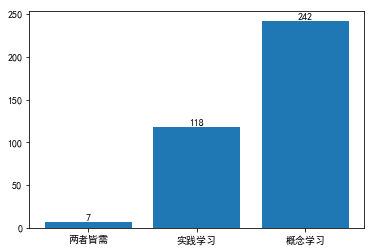

In [302]:
#data8.plot(kind='bar')
x = data8.index
y = data8
plt.bar(x,y)
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va='bottom')